# ch14. 정규 표현식

> <font size=4>**메타문자**

|메타문자| |사용예|설명|
|------|---|---|---|
|[ ]|문자 클래스|[abc]|a, b, c 중 한 개의 문자와 매치                              &nbsp;|
|[s-e]| |[0-2]<br>[a-c]<br>[a-zA-Z]<br>[0-9]|0,1,2<br>a,b,c<br>알파벳모두<br>숫자|
|^|반대|[^0-9]|숫자가 아닌 문자와 매치|
|<font color=red size=4><b>?|0또는1글자<br>(있어도 되고 없어도 되고)|ab?c|?앞에 문자 b를 0 또는 1번 반복<br>O abc<br>O ac<br>X abbc|
|<font color=red size=4><b>.|1글자|a.b<br>a[.]b|a + 모든문자 + b<br>a + Dot(.)문자 + b|
|<font color=red size=4><b>*|반복 0~|ca*t| *앞에 문자 a를 0~ 반복<br>O ct<br>O cat<br>O caaat|
|<font color=red size=4><b>+|반복 1~|ca+t| +앞에 문자 a를 1~ 반복<br>X ct<br>O cat<br>O caaat|  
|{s,e}|반복 s~e|{3,5}<br>{3, }<br>{ ,5}<br>{1, }<br>{0, }<br>ca{2}t<br> <br> <br>ca{2,4}t<br> <br> <br> <br>|3이상 ~ 5이하 반복<br>3~ 이상 반복<br>~5 이하 반복<br>+<br>*<br>{2}앞에 문자a를 2번반복<br>X cat<br>O caat<br>{2}앞에 문자a를 2 ~ 4번반복<br>X cat<br>O caat<br>O caaaat|

<pre> 
f"_______"
^…$	Starts and ends
(…)	Capture Group
(a(bc))	Capture Sub-group
(.*)	Capture all
(abc|&def)	Matches abc or def

> <font size=4> **자주 사용하는 문자 클래스**

|종류|문자클래스|설명|유사표현|
|------|---|---|---|
|숫자|<font color=red size=3><b>\d|숫자와 매치|[0-9]|
||<font color=red size=3><b>\D|숫자가 아닌 것과 매치|[^0-9]|
|숫자+문자|<font color=red size=3><b>\w|문자+숫자(alphanumeric)와 매치|[a-zA-Z0-9]|
||<font color=red size=3><b>\W|문자+숫자(alphanumeric)가 아닌 문자와 매치|[^a-zA-Z0-9]|
|특수문자|<font color=red size=3><b>\s|whitespace 문자와 매치|[ \t\n\r\f\v]|
||<font color=red size=3><b>\S|whitespace 문자가 아닌 것과 매치|[^ \t\n\r\f\v]|

> <font size=4> **import re 정규식을 이용한 문자열 검색**

|종류|설명|
|------|---|
|<font color=red size=3><b>match()|문자열의 처음부터 정규식과 매치되는지 검사|
|<font color=red size=3><b>search()|문자열 전체에서 정규식과 매치되는지 검사|
|<font color=red size=3><b>findall()|정규식과 매치되는 모든 문자열(substring)을 리스트로 반환|
|<font color=red size=3><b>finditer()|정규식과 매치되는 모든 문자열(substring)을 반복 가능한 객체로 반환|

--- 

In [1]:
import re

* <b>re.함수('패턴', '검색대상문자열')

In [4]:
m = re.match('[a-z]+', "10python10")
m

In [6]:
m = re.search('[a-z]+', "10python10agc")
m

<re.Match object; span=(2, 8), match='python'>

* <b>match()
  - 컴파일된 패턴 '[a-z]+'를 가지고 match() 메서드 수행

In [4]:
m = re.match('ab*', "python")
print(m)

m = re.match('[a-z]+', "python")
print(m, m.group())

m = re.match('[a-z]+', "3 python")
print(m)

None
<re.Match object; span=(0, 6), match='python'> python
None


--- 

* <b>패턴 '[a-z]+'를 매번 쓰기 귀찮다
    * p = re.compile('[a-z]+')

In [7]:
p = re.compile('[a-z]+')
  #re.search('[a-z]+', "10python10")
m = p.search(          "10python10")
print(m)

m = p.search("3 python")
print(m)

<re.Match object; span=(2, 8), match='python'>
<re.Match object; span=(2, 8), match='python'>


---

* <b>search()
  - 컴파일된 패턴 객체 '[a-z]+'를 가지고 search() 메서드 수행

In [5]:
p = re.compile('[a-z]+')
m = p.search("3 python 10 gdc")
print(m)

<re.Match object; span=(2, 8), match='python'>


* <b>findall()
  - 컴파일된 패턴 객체 '[a-z]+'를 가지고 findall() 메서드 수행 - <font color=red>정규식과 매치되는 리스트 반환

In [6]:
p = re.compile('[a-z]+')
m = p.findall("3 life is 100 too short 100")
print(m)

['life', 'is', 'too', 'short']


* <b>finditer()
  - 컴파일된 패턴 객체 '[a-z]+'를 가지고 finditer() 메서드 수행 - <font color=red>정규식과 매치되는 iterator 객체 반환

In [7]:
p = re.compile('[a-z]+')
m = p.finditer("a b cde 100")
print(m)
for match_obj in m: 
    print(match_obj, '\t', match_obj.group())

<re.Match object; span=(0, 1), match='a'> 	 a
<re.Match object; span=(2, 3), match='b'> 	 b
<re.Match object; span=(4, 7), match='cde'> 	 cde


> <font size=4> **re.compile( ___ , 옵션)**

## Quiz
* ref : https://regexone.com/

<pre>
정규식 a[.]{3,}b과 매치되는 문자열?

acccb
a....b
aaab
a.cccb

<pre>
다음은 무엇을 표현하기 위한 정규식인가?
"^.+[@].+[.].+$"

r"(\w+)\s+\d+[-]\d+[-]\d+"

* kim1234@naver.com

In [9]:
re.search('[a-zA-Z0-9]', "0")
#re.search(f'\w*[@]', "a1100@")

<re.Match object; span=(0, 1), match='0'>

In [29]:
# 혜린
re.search(f"\w+[@]\w+[.]\w+", "kim1234@naver.com")

<re.Match object; span=(0, 17), match='kim1234@naver.com'>

In [30]:
#김효선
re.search('[a-zA-Z0-9]+[@][a-zA-Z0-9]+[.][a-zA-Z0-9]+',"kim1214@naver.com")

<re.Match object; span=(0, 17), match='kim1214@naver.com'>

In [33]:
#우승우
#.[a-z]*
#[a-z]+
re.search('[A-Za-z0-9]+[@].[a-z]*[.].[a-z]*',"Kim1214@naver.com")

<re.Match object; span=(0, 17), match='Kim1214@naver.com'>

In [34]:
#김문식
re.search(f'^[\w]+[@].+[.]*.*[.][a-zA-Z]+$',"Kim1214@naver.com")

<re.Match object; span=(0, 17), match='Kim1214@naver.com'>

* 확장자 txt 패턴 찾기
<pre>
abc.txt aa.jpg  a100.txt  ==> abc.txt   a100.txt

In [40]:
# 혜린
#re.findall(".+[.]txt", "abc.txt aa.jpg a100.txt")
re.findall("\w+[.]txt", "abc.txt aa.jpg a100.txt")

['abc.txt', 'a100.txt']

* 한글명 찾기
<pre>
James 홍길동 아무개 ==> 홍길동 아무개

In [19]:
# re.findall("[^a-zA-Z]+", "James 홍길동 아무개")
re.findall("[가-힣]+", "James ㅠㅠㅠ 가길동 아무개")
re.findall("[ㄱ-ㅎㅏ-ㅣ가-힣]+", "James ㅠㅠㅠ ㅎㅎㅎ 까가길동 아무개")

['ㅠㅠㅠ', 'ㅎㅎㅎ', '까가길동', '아무개']

In [23]:
re.search(" [a-zA-Z]+[.]", "Heikkinen, Miss. Laina").group().strip()

'Miss.'

# [QUIZ] : 메뉴 정규식 표현

* 데이콘 구내식당 식수 AI 예측 경진대회
* ref : https://dacon.io/competitions/official/235743/data

In [37]:
import pandas as pd
df = pd.read_csv("lec14.re.train.csv")
df["중식메뉴"].head()

0    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...
1    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...
2    카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...
3    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...
4    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...
Name: 중식메뉴, dtype: object

In [29]:
df["중식메뉴"][0]

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) '

* '쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) '
* 쌀밥  오징어찌개 쇠불고기 계란찜 청포묵무침  요구르트  포기김치

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams["figure.figsize"] = (8,4)
mpl.rcParams['axes.grid'] = True 
path = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# plt.title('한글제목')
# plt.show()

NanumGothic


In [226]:
import re 
text = ' 쌀밥 /잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) '
text = re.sub(r'/^\s+|\s+$/g', '', text.strip())#앞뒤 공백 제거
text = text.replace(r' /','/')  #앞뒤 공백 제거
text = text.replace(r'/ ','/')  #앞뒤 공백 제거
  
list = text.split()
relist = []
for item in list:
    item = re.sub(r'\([^)]*\)', '', item.strip())  #(s) 제거
    item = re.sub(r'[^)]*\)', '', item.strip())    #s) 제거
    item = re.sub(r'\([^)]*', '', item.strip())    #(s 제거
    item = re.sub(' +', ' ', item.strip())       #공백,탭 제거
    if len(item) > 0:
        relist.append(item)
print(relist)

['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치']


In [232]:
tlist = "ㄱㄱ,ㄴㄴ,ㄷㄷ".split(",")
tlist
' '.join(tlist)

'ㄱㄱ ㄴㄴ ㄷㄷ'

## 방법1) 정규식 사용

In [154]:
def my_reg2(text):
    text = re.sub(r'/^\s+|\s+$/g', '', text.strip())#앞뒤 공백 제거
    text = text.replace(r' /','/')  #앞뒤 공백 제거
    text = text.replace(r'/ ','/')  #앞뒤 공백 제거
    
    list = text.split()
    relist = []
    for item in list:
        item = re.sub(r'\([^)]*\)'  , '', item.strip())  #(s) 제거
        item = re.sub(r'[^)]*\)'    , '', item.strip())  #s) 제거
        item = re.sub(r'\([^)]*'    , '', item.strip())  #(s 제거
        item = re.sub(r'쌀밥/잡곡밥' , '쌀밥', item.strip())  #
        
        
        if len(item) > 0:
            relist.append(item.strip())
    return ','.join(relist)
    

df['중식메뉴2'] = df['중식메뉴'].apply(lambda x: my_reg2(x))
df[['중식메뉴','중식메뉴2']].head(2)

,중식메뉴,중식메뉴2
0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치"
1,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","쌀밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이"


In [93]:
df["cnt"] = df['중식메뉴2'].apply(lambda x: len(x.split(",")))
df.head()
print(df["cnt"].max())

10


## 방법2) 단순 조건절 사용

In [215]:
tot_menu_list = []
def my_reg3(menu_str):
    x_ = []
    menu_list = menu_str.split(' ')
    for menu in menu_list:
        if '(' in menu or ')' in menu:
            continue
        elif '' == menu:
            continue
        # elif '쌀밥/잡곡밥' == menu:
        elif '/' in menu:
            menu =  menu.split("/")[0]
            x_.append(menu)
        else:
            x_.append(menu)
        tot_menu_list.append(menu)
    return ','.join(x_)

In [216]:
df['중식메뉴3'] = df['중식메뉴'].apply(lambda x: my_reg3(x))
df[['중식메뉴','중식메뉴3']].head(2)

,중식메뉴,중식메뉴3
0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치"
1,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","쌀밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이"


In [217]:
df["cnt3"] = df['중식메뉴3'].apply(lambda x: len(x.split(",")))
df.head()
print(df["cnt3"].max())

10


In [218]:
tot_menu_list[:5]

['쌀밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침']

# menu_df 생성

In [182]:
df['중식메뉴2'].str.split(",").tolist()[:3]

[['쌀밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치']]

In [152]:
menu_df = pd.DataFrame(df['중식메뉴2'].str.split(",").tolist()
                       , columns=["m"+str(i) for i in range(1,11)]
                      )
menu_df['중식메뉴']  = df['중식메뉴']
menu_df['중식메뉴2'] = df['중식메뉴2']
menu_df.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,중식메뉴,중식메뉴2
0,쌀밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치,None,None,None,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치"
1,쌀밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이,None,None,None,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","쌀밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이"
2,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치,None,None,None,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치"
3,쌀밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치,None,None,None,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","쌀밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치"
4,쌀밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치,None,None,None,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치"


## 시각화

In [223]:
for i in tot_menu_list:
    if len(i) > 7:
        print(i)

돌나물무침/치킨무
호박꼬지&고사리&무나물
모둠양채쌈*쌈장
골뱅이무침*소면
콩나물밥*달래장
치킨텐더*요거트D
치커리유자청생채
브로컬리맛살볶음
오징어볶음*소면
쇠고기단호박조림
브로컬리두부무침
멸치크랜베리볶음
골뱅이무침*소면
오이무침/치킨무
포기김치/상추쌈
목살데리야끼구이
골뱅이무침&소면
브로컬리두부무침
골뱅이무침*소면
쌈무/참나물생채
오이도라지무침/수박
부대찌개*라면사리
웨지감자오븐구이
연근/오징어튀김
오꼬노미계란말이
오징어브로컬리숙회
새우까스&탈탈소스
치커리유자청무침
꽃맛살오리엔탈샐러드
골뱅이무침*소면
오리훈제고추장볶음
마늘쫑건새우볶음
메추리알곤약조림
산채비빔밥*강된장
치커리유자청무침
멸치크렌베리볶음
생선까스*탈탈소스
치킨핑거*요거트D
골뱅이무침*소면
실곤약흑임자무침
배추쌈/무말랭이
쨔샤이무침/아이스슈
차돌박이된장찌개
다시마*브로컬리
치커리유자청무침
오징어볶음*소면
꽈리고추어묵볶음
꽈리고추멸치볶음
씨리얼과일샐러드
모듬버섯구이*초장
오징어볶음*소면
언양식불고기*양파채
스위트칠리미트볼
보름나물/김구이
두부구이*양념장
생선까스*탈탈소스
양파절임/오이부추무침
팝콘치킨*데리마요
곤드레밥*강된장
골뱅이무침*소면
건새우마늘쫑볶음
오꼬노미계란말이
버섯구이*발사믹D
브로컬리맛살볶음
아삭고추된장무침
매콤함박스테이크
훈제오리구이/쌈무
부추생채/양파절임
생선까스*타르소스
돈육꽈리고추볶음
치커리유자청무침
버섯구이*발사믹D
모둠쌈/씨앗쌈장
골뱅이무침*소면
어묵꽈리고추볶음
곤드레밥*강된장
훈제오리고추장볶음
양배추쌈*양념장
치커리유자청무침
오징어굴소스볶음
오징어브로컬리*초장
멸치크렌베리볶음
꽈리고추어묵조림
호박잎/양배추쌈
오징어볶음*소면
해물까스*칠리소스
곤드레밥*강된장
주꾸미굴소스볶음
두부구이*양념장
오징어볶음*소면
오꼬노미야끼계란말이
실곤약흑임자무침
오징어볶음*소면
치커리유자청무침
쇠고기매운버섯국
곤드레밥*강된장
콩나물파채/상추쌈
곤드레밥*간장양념
치커리유자청무침
골뱅이무침*소면
생선까스&탈탈소스
마늘쫑건새우볶음
김구이*달래간장
두부오꼬노미야끼
곤드레밥*간장양념
가래떡돼지갈비찜
아삭고추

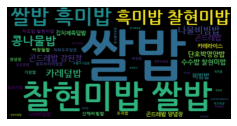

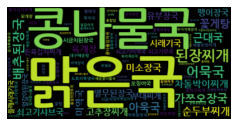

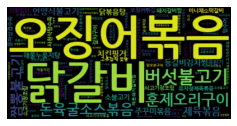

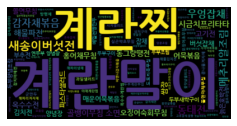

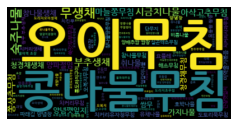

In [241]:
col_list = ["m1","m2","m3","m4","m5"]
for col in col_list:
    plt.figure(figsize=(4,4))
    text = " ".join(menu_df[col])
    wordcloud = WordCloud(max_font_size=100, font_path='C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    plt.close()